In [3]:
import scvelo as scv
import scanpy
scv.logging.print_version()

Running scvelo 0.3.1 (python 3.11.5) on 2024-03-16 00:34.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization


In [4]:
adata = scanpy.read_h5ad("/Users/kevinlin/Library/CloudStorage/Dropbox/Collaboration-and-People/zhaoheng/out/genePathwayManifold/velocity_conversions/scvelo_pancreas_seurat_example.h5ad") 
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters'
    var: 'features', 'spliced_features', 'unspliced_features'
    layers: 'spliced', 'unspliced'

In [19]:
adata.obs['clusters']

AAACCTGAGAGGGATA    3
AAACCTGAGCCTTGAT    0
AAACCTGAGGCAATTA    5
AAACCTGCATCATCCC    0
AAACCTGGTAAGTGGC    2
                   ..
TTTGTCAAGTGACATA    3
TTTGTCAAGTGTGGCA    2
TTTGTCAGTTGTTTGG    0
TTTGTCATCGAATGCT    5
TTTGTCATCTGTTTGT    7
Name: clusters, Length: 3696, dtype: category
Categories (8, int32): [0, 1, 2, 3, 4, 5, 6, 7]

In [6]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.


/var/folders/hs/22vv3mms6xbbkl2xk5frsnhc0000gp/T/ipykernel_63440/2386943043.py:4: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata)


In [7]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 22 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.


/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
adata

AnnData object with n_obs × n_vars = 3696 × 1923
    obs: 'clusters_coarse', 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'features', 'spliced_features', 'unspliced_features', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'log1p', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [12]:
scanpy.tl.pca(adata, svd_solver="arpack")

In [13]:
scanpy.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [14]:
scanpy.tl.umap(adata)

In [15]:
adata

AnnData object with n_obs × n_vars = 3696 × 1923
    obs: 'clusters_coarse', 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'features', 'spliced_features', 'unspliced_features', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'log1p', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [16]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


In [17]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/12 cores)
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/kevinlin/miniconda3/envs/genePathwayManifold/lib/python3.11/site-packages/scvelo/plotting/utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/Users/

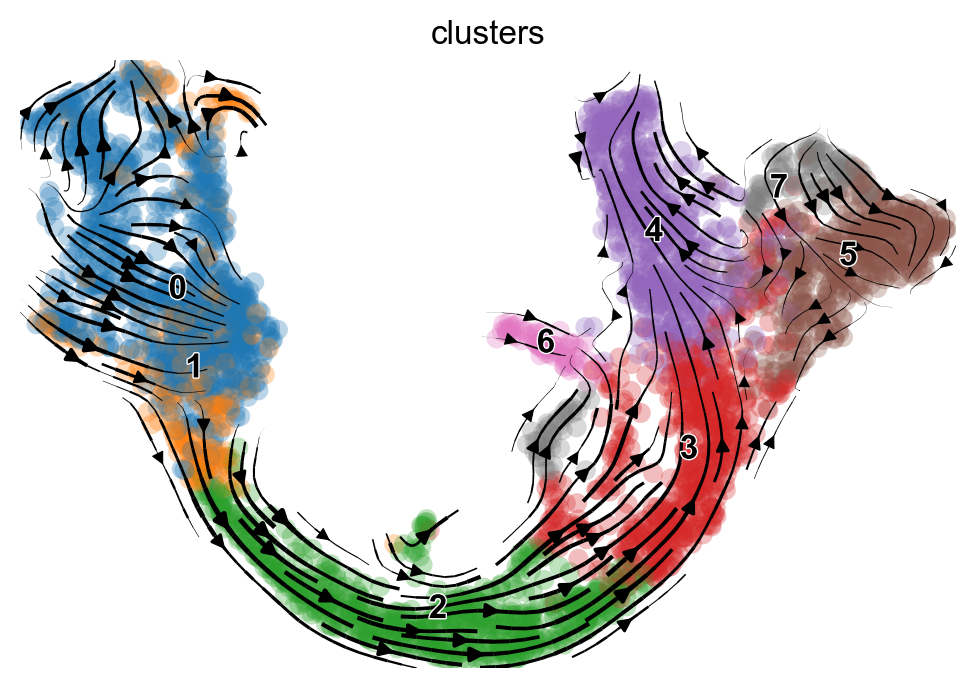

In [18]:
scv.pl.velocity_embedding_stream(adata, basis='umap')